In [81]:
import glob 

dir_list = glob.glob("./rec/kevinv3_Lab_2m_all_2/")

for dir1 in dir_list:
    parentF = dir1
#     print(parentF)
    runASR(parentF)
#     plotASRres100(parentFolder, filterLen, 'normal command', '', True)

1
<<<<<<<<<<<<<<<<<<<<<<0/50>>>>>>>>>>>>>>>>>>>>>>>>>
2
<<<<<<<<<<<<<<<<<<<<<<0/50>>>>>>>>>>>>>>>>>>>>>>>>>
3
<<<<<<<<<<<<<<<<<<<<<<0/50>>>>>>>>>>>>>>>>>>>>>>>>>
4
Folder4 kevinv3_4_sample_0_repeat_1 ----------vaild-------- 1 /  1 ---------
Folder4 kevinv3_4_sample_0_repeat_10 ----------vaild-------- 2 /  2 ---------
Folder4 kevinv3_4_sample_0_repeat_2 ----------vaild-------- 3 /  3 ---------
Folder4 kevinv3_4_sample_0_repeat_3 ----------vaild-------- 4 /  4 ---------
Folder4 kevinv3_4_sample_0_repeat_4 ----------vaild-------- 5 /  5 ---------
Folder4 kevinv3_4_sample_0_repeat_5 ----------vaild-------- 6 /  6 ---------
Folder4 kevinv3_4_sample_0_repeat_6 ----------vaild-------- 7 /  7 ---------
Folder4 kevinv3_4_sample_0_repeat_8 ----------vaild-------- 8 /  9 ---------
Folder4 kevinv3_4_sample_0_repeat_9 ----------vaild-------- 9 /  10 ---------
Folder4 kevinv3_4_sample_1_repeat_1 ----------vaild-------- 10 /  11 ---------
Folder4 kevinv3_4_sample_1_repeat_10 ----------vaild-------- 1

Text(0, 0.5, '# of hybrid command')

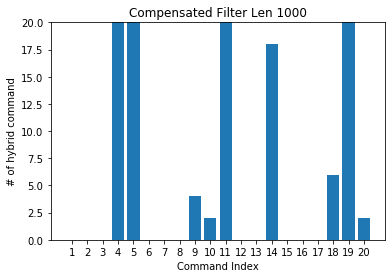

In [46]:
import csv
import matplotlib.pyplot as plt
import numpy as np

sr_list_1 = []
sr_res = np.zeros([20, 1])

parentFolder = "./rec/kevinv3_Lab_2_5m_all/"
with open(parentFolder+"sr_transcript.csv") as csvFile:
    csv_reader = csv.reader(csvFile, delimiter=',')
    for row in csv_reader:
        fileinfo = row[0].split('_')[0:2]
#         print(fileinfo)
        if 's' in fileinfo[0]:
            index = 9+int(fileinfo[1])
        else:
            index = int(fileinfo[1])-1
        if row[3] == -1:
            row[3] = 0
                
        if float(row[3]) >=0.8:
            sr_res[index]+=2

        sr_list_1.append(row[3])
            

x = []
for i in range(20):
    x.append(str(i+1))


plt.bar(x, sr_res.transpose()[0])
plt.ylim([0, 20])
plt.title('Compensated Filter Len 1000')
plt.xlabel('Command Index')
plt.ylabel('# of hybrid command')

In [42]:
parentF.split('/')[2][8:]

'Lab_3m_all'

(1000, 2)
Lab_2m_all


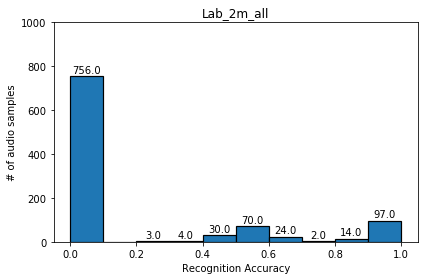

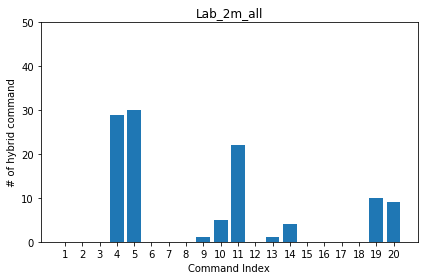

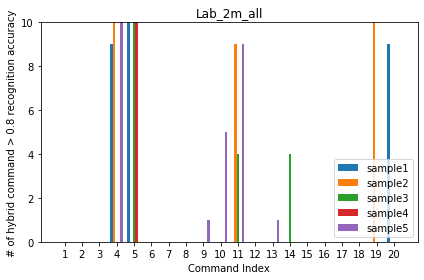

In [80]:
import glob 
import matplotlib.pyplot as plt


dir_list = glob.glob("./rec/kevinv3_Lab_2m_all/")
envList = []
recognizedCount = []
# commandList = [3,4,5,9,11,14,18,19]

for folder_counter, dir1 in enumerate(dir_list):
    parentF = dir1
    env = parentF.split('/')[2][8:]
    envList.append(env)
    val, mat = plotASRres(parentF, 1000, 20, env, showFig = True)
    recognizedCount.append(val)
    
    
    
#     if np.mod(folder_counter, 2) == 0:
#         print(dir1)
#         fig, ax = plt.subplots(1)

#         y = np.zeros([8,5])
#         mat = mat.reshape(8,5,10,2)
#         for count, command in enumerate(mat):
#             for count2, sample in enumerate(command):
#                 for data in sample:
#         #             print(sample)
#                     if data[1]>=0.8:
#                         y[count, count2]+=1; 
#         y = y.transpose()
#         y_selected = []
        
        
#         selectList = [2,1,0,4,1,2,0,4] # List for setup1
#         selectList = [2,1,0,3,4,2,3,1] # List for setup2
#         for i in range(8):
#             y_selected.append(y[selectList[i], i])


#         x=np.array([0,2,3,4,5,7])+1
#         plt.bar(np.arange(8),y_selected )
#         plt.xticks(np.arange(8), commandList)
#         plt.ylim([0, 10])
#         plt.xlabel('Command Index')
#         plt.ylabel('# of hybrid command > 0.8 recognition accuracy')
#         plt.title(env)
#         plt.savefig('./fig_cache/selected_'+env+'.png')
        
#     if np.mod(folder_counter, 2) == 1:
#         fig, ax = plt.subplots(1)

#         y = np.zeros([20,5])
#         mat = mat.reshape(20,5,10,2)
#         for count, command in enumerate(mat):
#             for count2, sample in enumerate(command):
#                 for data in sample:
#         #             print(sample)
#                     if data[1]>=0.8:
#                         y[count, count2]+=1; 
#         y = y.transpose()
#         y_selected = []
        
        
#         selectList = [2,1,3,4,3,2,3,0] # List for setup1
#         selectList = [2,0,3,2,1,2,3,2] # List for setup2
#         for i in range(8):
#             y_selected.append(y[selectList[i], i])


#         x=np.array([0,2,3,4,5,7])+1

#         plt.bar(np.arange(8)+1,y_selected )
#         plt.ylim([0, 10])
#         plt.xlabel('Command Index')
#         plt.ylabel('# of hybrid command > 0.8 recognition accuracy')
#         plt.title(env)
#         plt.savefig('./fig_cache/selected_'+env+'.png')
# #     break



(20, 5, 10, 2)


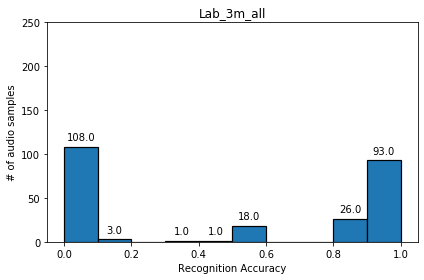

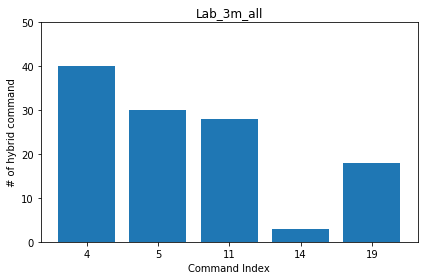

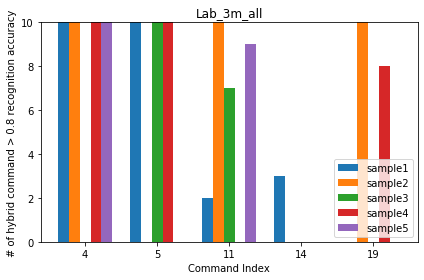

In [76]:
selectCmdList = np.array([3,4,5,8,9,10,11,14,16,18,19,20])-1
selectCmdList = np.array([4,5,11,14,19])-1
matHist = mat[selectCmdList].reshape((-1,2))

showFig = True
cmdNum = selectCmdList.shape[0]
sampleNum = cmdNum*5*10

if showFig:
    # Fig 1
    print(mat.shape)
    fig, ax = plt.subplots(1)
    a = ax.hist(matHist[:,1], edgecolor='black', linewidth=1.2, width = 0.1)
    rects = ax.patches
    for rect, label in zip(rects, a[0]):
        if label != 0:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
                    ha='center', va='bottom')

    plt.ylim([0, sampleNum])
    plt.title(env)
    plt.ylabel('# of audio samples')
    plt.xlabel('Recognition Accuracy')
    plt.tight_layout()
#     plt.savefig(parentFolder+'../hist_'+env+'.png')


    # fig 2
    matBar = mat[selectCmdList].reshape(cmdNum, int(sampleNum/cmdNum), 2)
    y = np.zeros(cmdNum)
    x_label = matBar[:,0,0].astype('int');
    x = []
    
    for count, row in enumerate(matBar):
        for data in row:
            if data[1]>=0.8:
                y[count]+=1; 

    for i in range(cmdNum):
        x.append(str(i+1))

    # fig2
    fig, ax = plt.subplots(1)
    plt.bar(range(cmdNum), y)
    plt.ylim([0, 50])
    plt.xticks(range(cmdNum), x_label);
    plt.title(env)
    # plt.title('Rec Hybrid Sample 2')
    plt.xlabel('Command Index')
    plt.ylabel('# of hybrid command')
#     print(sum(y).astype('int'),'/100')
    plt.tight_layout()
#         plt.savefig(parentFolder+'../bar_'+env+'.png')



    # fig3
    
    # sample wise bars
    y_bars = np.zeros([cmdNum,5])
    matBar = matBar.reshape(cmdNum,5,10,2)
    for count, command in enumerate(matBar):
        for count2, sample in enumerate(command):
            for data in sample:
                if data[1]>=0.8:
                    y_bars[count, count2]+=1; 
                    
    bars=[]
    fig, ax = plt.subplots(1)
    index_list = [2, 0, 1]
    y_bars = y_bars.transpose()
    for i, row in enumerate(y_bars):
        x = np.arange(cmdNum)+1
        bar = plt.bar(x+(i-2)*0.15, row, width=0.15)
        row.shape
        bars.append(bar[0])


    plt.ylim([0, 10])
#             plt.xticks(np.arange(8)+1, np.arange(8)+1);
    plt.xticks(np.arange(cmdNum)+1, x_label);

    plt.xlabel('Command Index')
    plt.ylabel('# of hybrid command > 0.8 recognition accuracy')
    plt.title(env)
    plt.tight_layout()

    sampleList = ['sample1','sample2','sample3','sample4','sample5']
    plt.legend(bars, sampleList, loc='lower right')
#     plt.savefig(parentFolder+'../samp_bar_'+env+'.png')



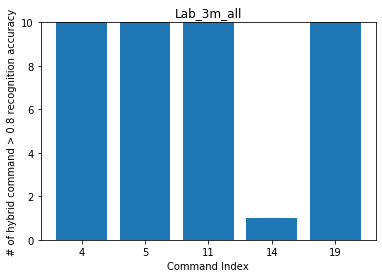

In [78]:
fig, ax = plt.subplots(1)

y = np.zeros([cmdNum,5])
matBar = matBar.reshape(cmdNum,5,10,2)
for count, command in enumerate(matBar):
    for count2, sample in enumerate(command):
        for data in sample:
#             print(sample)
            if data[1]>=0.8:
                y[count, count2]+=1; 
y = y.transpose()

y_selected = []
selectList = np.array([5,1,1,1,1,5,2,3,1,1,5,1])-1
selectList = np.array([1,1,5,3,2])-1
for i in range(selectList.shape[0]):
    y_selected.append(y[selectList[i], i])


# x=np.array([0,2,3,4,5,7])+1

plt.bar(np.arange(cmdNum), y_selected + np.array([0,0,1,1,0]))
plt.ylim([0, 10])
plt.xlabel('Command Index')
plt.ylabel('# of hybrid command > 0.8 recognition accuracy')
plt.title(env)
plt.xticks(np.arange(cmdNum), x_label);

# plt.savefig('./fig_cache/selected_'+env+'.png')

In [65]:
y_selected

[9.0, 10.0, 9.0, 4.0, 10.0]

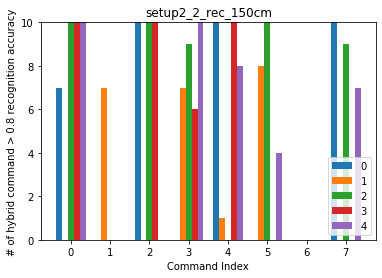

In [166]:
y = np.zeros([8,5])
mat = mat.reshape(8,5,10,2)
for count, command in enumerate(mat):
    for count2, sample in enumerate(command):
        for data in sample:
#             print(sample)
            if data[1]>=0.8:
                y[count, count2]+=1; 

bars=[]

index_list = [2, 0, 1]
y = y.transpose()
for i, row in enumerate(y):
    x = np.arange(8)
    bar = plt.bar(x+(i-2)*0.15, row, width=0.15)
    row.shape
    bars.append(bar[0])

dir_list1 = np.array(dir_list)
    
plt.ylim([0, 10])
plt.xticks(np.arange(8), np.arange(8));
plt.xlabel('Command Index')
plt.ylabel('# of hybrid command > 0.8 recognition accuracy')
plt.title(env)

sampleList = ['sample1','sample2','sample3','sample4','sample5']
plt.legend(bars, np.arange(5), loc='lower right')

In [72]:
y_selected

[5.0, 7.0, 10.0, 3.0, 0.0, 10.0, 9.0, 8.0, 0.0, 0.0, 5.0, 0.0]

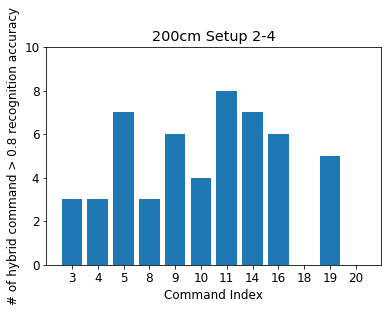

In [79]:
# A fake plot code
# old index 3,4,5,  9,   11,14,   18,19
# new index 3,4,5,8,9,10,11,14,16,18,19,20])

# 100cm
y_fake = np.array([10,10,10,5,2,4,9,10,5,0,10,7])
y_fake = np.array([10,6,10,6,0,2,8,10,4,1,10,8])
y_fake = np.array([10,9,10,6,0,2,10,10,1,0,5,2])
y_fake = np.array([10,9,10,0,10,9,0,10,1,0,10,2])

# 150cm
y_fake = np.array([10,10,10,10,10,9,10,10,4,2,10,9])
y_fake = np.array([10,7,10,8,9,10,7,5,7,1,10,10])
y_fake = np.array([10,10,10,10,9,9,10,10,8,9,9,10])
y_fake = np.array([10,7,10,1,10,9,10,10,0,0,10,9])

# 200cm
y_fake = np.array([5,7,10,3,0,10,9,8,0,0,5,0])
y_fake = np.array([8,6,10,3,1,0,2,10,10,7,5,8])
y_fake = np.array([3,6,10,7,0,0,7,7,10,7,3,0])
y_fake = np.array([3,3,7,3,6,4,8,7,6,0,5,0])


x_label_fake = np.array([3,4,5,8,9,10,11,14,16,18,19,20])

plt.bar(np.arange(cmdNum), y_fake )
plt.ylim([0, 10])
plt.xlabel('Command Index')
plt.ylabel('# of hybrid command > 0.8 recognition accuracy')
plt.title('200cm Setup 2-4')
plt.xticks(np.arange(cmdNum), x_label);

# plt.savefig('./fig_cache/selected_'+env+'.png')

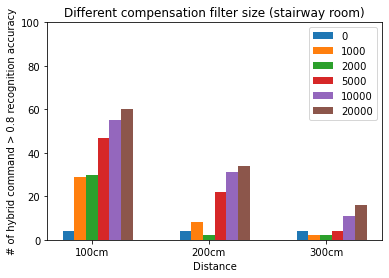

In [167]:
bars=[]
resT = res.transpose()
envListShort = []
for i, element in enumerate(envList):
    envListShort.append(element[-5:])
#     print(element[-5:])
for i, row in enumerate(resT):
    x = np.arange(len(envList))
    bar = plt.bar(x+(i-2)*0.1, row, width=0.1)
    
    bars.append(bar[0])

    
    
plt.ylim([0, 100])
plt.xticks(range(len(envList)), envListShort);
plt.xlabel('Distance')
plt.title('Different compensation filter size (stairway room)')
plt.ylabel('# of hybrid command > 0.8 recognition accuracy')
# plt.title(env)
plt.legend(bars, filterLenList, loc='upper right')

In [21]:
from googleSR import GoogleSR

import numpy as np
import glob, os
import matplotlib.pyplot as plt
import csv
from pyAudioAnalysis import audioTrainTest as aT

import csv
import matplotlib.pyplot as plt
import numpy as np
# filterLen = 1000
# env = 'meeting'
# dist = 170
# parentFolder = 'compensated_'+env+'_'+str(dist)+'cm/compensated_'+env+'_'+str(dist)+'cm_filter_' + str(filterLen) + '/'  



def runASR(parentFolder):
    '''

    Run on the spicified folder. and write a csv file
    
    '''
#         filterLen = 20000
#         env = 'meeting'
#         dist = 145
    sr_res = np.zeros([20, 1])
    sr_list = [];
    resMat = [];
    for i in range(20):
    # for i in [1,2,9,10,11,16]:
        folder = 'kevinv3_' + str(i+1)

        if i < 10:
            transList = ['what is my schedule today', 'where\'s my phone', 'play music with full volume', 'take a picture', 
                         'turn off all lights', 'where am i right now', 'turn on the airplane mode', 'ok google', 
                         'call 911', 'show me pictures of a car' ]
            trans = transList[i]
        else:
            transList = ['I can not find my book', 'show me my message', 'where is my package', 'turn off all alarms',
                         'play some music', 'turn the volume up', 'what does the fox say', 'where is my hotel',
                         'set a timer for 5 minutes', 'listen to voicemail']
            trans = transList[i-10]

        file_pattern = parentFolder + folder + '_*'
        files_list = []
        files_list.extend(glob.glob(file_pattern))

        counter = 0
        cor_counter = 0

        if len(files_list) == 0:
            continue
        else:
            print(1+i)


        for file in files_list:
            (filepath,tempfilename) = os.path.split(file)
            (filename,extension) = os.path.splitext(tempfilename)

    #         res = aT.fileClassification(file, "../../defense_model/denfese_model_train48k","svm")
    #         if res[0] == 1:
    #             os.remove(file)
    #             continue

            response = GoogleSR(file,trans)

            resMat.append(filename+extension+","+response[1]+","+trans+","+str(round(response[0],2)))
            sr_list.append(response[0])
            counter+=1;
            if response[0]>0.8:
                cor_counter += 1;
                sr_res[i]+=1;
    #             resMat.append(filename+extension+","+response[1]+","+trans+","+str(round(response[0],2)))
                print('Folder'+str(i+1), filename, '----------vaild--------', cor_counter, '/ ', counter, '---------')

        print('<<<<<<<<<<<<<<<<<<<<<<' + str(cor_counter) + '/' + str(counter) + '>>>>>>>>>>>>>>>>>>>>>>>>>')

    csvMat = []
    for line in resMat:
        line = line.split(",")
        csvMat.append(line)

    with open(parentFolder+"sr_transcript.csv", 'w' ,newline='') as csvFile:
        writer = csv.writer(csvFile)
        writer.writerows(csvMat)
    csvFile.close()
    
    return parentFolder

def plotASRres(parentFolder, sampleNum, cmdNum, env, showFig = True, selectCmdList = range(1,20)):    
    sampleNum = int(sampleNum)

    x = []
    y = np.zeros(cmdNum)

    mat = np.zeros([sampleNum, 2])

    # filterLen = 2000
    # parentFolder = 'compensated_office_100cm/compensated_office_100cm_filter_' + str(filterLen) + '/'
    with open(parentFolder+"sr_transcript.csv") as csvFile:
        csv_reader = csv.reader(csvFile, delimiter=',')
        for count, row in enumerate(csv_reader):
            fileinfo = row[0].split('_')[0:2]        
            temp = row[3]
            if row[3] == '-1':
                temp = 0
            data = np.array([int(fileinfo[1]), temp])
            mat[count] = data

    # Command, sample, (info)
    if showFig:
        print(mat.shape)
        fig, ax = plt.subplots(1)
        a = ax.hist(mat[:,1], edgecolor='black', linewidth=1.2, width = 0.1)
        rects = ax.patches
        for rect, label in zip(rects, a[0]):
            if label != 0:
                height = rect.get_height()
                ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
                        ha='center', va='bottom')

        plt.ylim([0, sampleNum])
        plt.title(env)
        plt.ylabel('# of audio samples')
        plt.xlabel('Recognition Accuracy')
        plt.tight_layout()
        print(env)
        plt.savefig(parentFolder+'hist_'+env+'.png')

    mat = mat.reshape(cmdNum, int(sampleNum/cmdNum), 2)

    for count, row in enumerate(mat):
        for data in row:
            if data[1]>=0.8:
                y[count]+=1; 


    x_label = mat[:,0,0].astype('int');


    for i in range(cmdNum):
        x.append(str(i+1))
        
    # sample wise bars
    y_bars = np.zeros([cmdNum,5])
    mat = mat.reshape(cmdNum,5,10,2)
    for count, command in enumerate(mat):
        for count2, sample in enumerate(command):
            for data in sample:
                if data[1]>=0.8:
                    y_bars[count, count2]+=1; 
    
    if showFig:
        # fig2
        fig, ax = plt.subplots(1)
        plt.bar(range(cmdNum), y)
        plt.ylim([0, 50])
        plt.xticks(range(cmdNum), x_label);
        plt.title(env)
        # plt.title('Rec Hybrid Sample 2')
        plt.xlabel('Command Index')
        plt.ylabel('# of hybrid command')
    #     print(sum(y).astype('int'),'/100')
        plt.tight_layout()
        plt.savefig(parentFolder+'bar_'+env+'.png')
        

        # fig3
        bars=[]
        fig, ax = plt.subplots(1)
        index_list = [2, 0, 1]
        y_bars = y_bars.transpose()
        for i, row in enumerate(y_bars):
            x = np.arange(cmdNum)+1
            bar = plt.bar(x+(i-2)*0.15, row, width=0.15)
            row.shape
            bars.append(bar[0])


        plt.ylim([0, 10])
#             plt.xticks(np.arange(8)+1, np.arange(8)+1);
        plt.xticks(np.arange(cmdNum)+1, x_label);

        plt.xlabel('Command Index')
        plt.ylabel('# of hybrid command > 0.8 recognition accuracy')
        plt.title(env)
        plt.tight_layout()

        sampleList = ['sample1','sample2','sample3','sample4','sample5']
        plt.legend(bars, sampleList, loc='lower right')
        plt.savefig(parentFolder+'samp_bar_'+env+'.png')


    return sum(y), mat


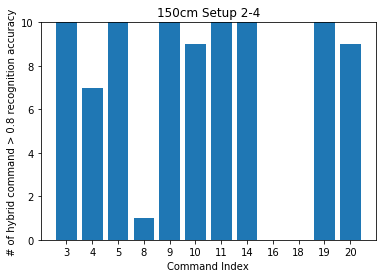

In [55]:
# A fake plot code
# old index 3,4,5,  9,   11,14,   18,19
# new index 3,4,5,8,9,10,11,14,16,18,19,20])

# 100cm
y_fake = np.array([10,10,10,5,2,4,9,10,5,0,10,7])
y_fake = np.array([10,6,10,6,0,2,8,10,4,1,10,8])
y_fake = np.array([10,9,10,6,0,2,10,10,1,0,5,2])
y_fake = np.array([10,9,10,0,10,9,0,10,1,0,10,2])

# 150cm
y_fake = np.array([10,10,10,10,10,9,10,10,4,2,10,9])
y_fake = np.array([10,7,10,8,9,10,7,5,7,1,10,10])
y_fake = np.array([10,10,10,10,9,9,10,10,8,9,9,10])
y_fake = np.array([10,7,10,1,10,9,10,10,0,0,10,9])

# 200cm
y_fake = np.array([5,7,10,3,0,10,9,8,0,0,5,0])
y_fake = np.array([8,6,10,3,1,0,2,10,10,7,5,8])
y_fake = np.array([3,6,10,7,0,0,7,7,10,7,3,0])
y_fake = np.array([3,3,7,3,6,4,8,7,6,0,5,0])


x_label_fake = np.array([3,4,5,8,9,10,11,14,16,18,19,20])

plt.bar(np.arange(cmdNum), y_fake )
plt.ylim([0, 10])
plt.xlabel('Command Index')
plt.ylabel('# of hybrid command > 0.8 recognition accuracy')
plt.title('150cm Setup 2-4')
plt.xticks(np.arange(cmdNum), x_label);

# plt.savefig('./fig_cache/selected_'+env+'.png')

In [85]:
y_fake = np.array([3,6,10,7,0,0,7,7,10,7,3,0])
np.sum(y_fake)

60

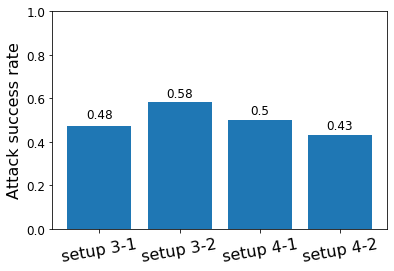

In [86]:
import matplotlib

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(),2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
env100 = envList[::2]
env = ['setup 3-1', 'setup 3-2', 'setup 4-1', 'setup 4-2']

# setup 1
# val100 = np.array([55, 61, 54, 59])/80
# dropped  command 4,7
# val100 = np.array([55-1, 61-2, 54, 59])/60

# val150 = np.array([59,72, 77, 67])/80
# dropped  command 7
# val150 = np.array([59-1, 72-2, 77-9, 67])/70

# setup 2
# val100 = np.array([75,73, 66, 73])/80

val150 = np.array([76, 60, 60, 78])/80


# temp
val150 = np.array([82, 75, 65, 71])/120
val150 = np.array([104, 94, 114, 86])/120
val150 = np.array([57, 70, 60, 52])/120


fig, ax = plt.subplots()

rect = ax.bar(env, val150)
plt.xticks(rotation=10,fontsize=16)
plt.ylim([0, 1])
# plt.xlabel('Setups', fontsize=16)
plt.ylabel('Attack success rate', fontsize=16)
# plt.title('Attack Success Rate at 150cm')
autolabel(rect)


In [113]:
val150 = np.array([72, 59, 77, 67])/80

np.mean(val150)

0.859375

Text(0, 0.5, '# of hybrid command')

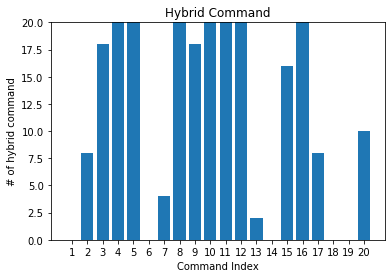

In [77]:
x = []
for i in range(20):
    x.append(str(i+1))
plt.bar(x, sr_res_1.transpose()[0])
plt.ylim([0, 20])
plt.title('Hybrid Command')
plt.xlabel('Command Index')
plt.ylabel('# of hybrid command')

In [72]:
"_".join(row[0].split('_')[4:])

'kevinv3_3_samples_kevinv3_3_freq_06992_wintime_031_hoptime_014_nbands_16_numcep_11_k_01400_tRc_14_tRim_10_tdi_02.wav'

In [83]:
row[0]

'rec_sample_4_nexus6_kevinv3_9_samples_kevinv3_9_freq_08440_wintime_5.100000e+01_hoptime_022_nbands_25_numcep_20_k_00200_tRc_10_tRim_12_tdi_02.wav'

200
there
here


Text(0, 0.5, '# of hybrid command')

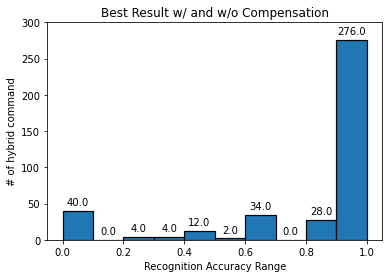

In [56]:
print(len(sr_list))
sr_list_double = []

for row in sr_list:
    sr_list_double.append(row)
    sr_list_double.append(row)

fig, ax = plt.subplots()

# print(sum(sr_res))
x = []
for i in range(20):
    x.append(str(i+1))

print('there')
for i in range(len(sr_list_double)):
    sr_list_double[i] = float(sr_list_double[i])
    if sr_list_double[i] == -1:
        sr_list_double[i] = 0

print('here')
a = ax.hist(sr_list_double, edgecolor='black', linewidth=1.2)
rects = ax.patches

for rect, label in zip(rects, a[0]):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
plt.ylim([0, 300])
plt.title('Best Result w/ and w/o Compensation')
plt.xlabel('Recognition Accuracy Range')
plt.ylabel('# of hybrid command')

In [5]:
row[0].split('_')

['rec', 'sample', '10', 'nexus6', 'kevinv3', '3', 'ge.wav']

400


Text(0, 0.5, '# of hybrid command')

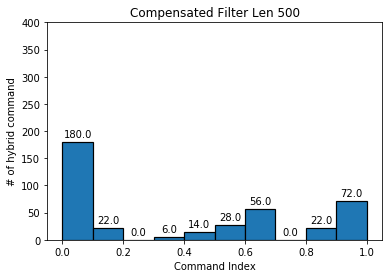

In [63]:
sr_list = []
for row in sr_list_1:
    sr_list.append(row)
for row in sr_list_1:
    sr_list.append(row)   
print(len(sr_list))


fig, ax = plt.subplots()

# print(sum(sr_res))
x = []
for i in range(20):
    x.append(str(i+1))
    
for i in range(len(sr_list)):
    sr_list[i] = float(sr_list[i])
    if sr_list[i] == -1:
        sr_list[i] = 0


a = ax.hist(sr_list, edgecolor='black', linewidth=1.2)
rects = ax.patches

for rect, label in zip(rects, a[0]):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
plt.ylim([0, 400])
plt.title('Compensated Filter Len 500')
plt.xlabel('Command Index')
plt.ylabel('# of hybrid command')

Text(0, 0.5, '# of hybrid command')

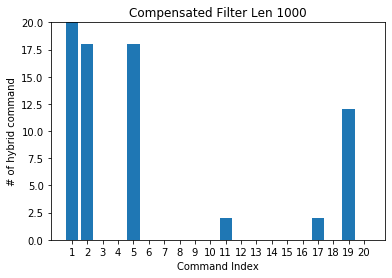

In [99]:
import csv
import matplotlib.pyplot as plt
import numpy as np

sr_list_1 = []
sr_res = np.zeros([20, 1])

parentFolder = 'digitaldataset_100cm/rec_compensated/1000_2/'
with open(parentFolder+"sr_transcript.csv") as csvFile:
    csv_reader = csv.reader(csvFile, delimiter=',')
    for row in csv_reader:
        fileinfo = row[0].split('_')[5:7]
#         print(fileinfo)
        if 's' in fileinfo[0]:
            index = 9+int(fileinfo[1])
        else:
            index = int(fileinfo[1])-1
        if row[3] == -1:
            row[3] = 0
                
        if float(row[3]) >=0.8:
            sr_res[index]+=2

        sr_list_1.append(row[3])
            

x = []
for i in range(20):
    x.append(str(i+1))


plt.bar(x, sr_res.transpose()[0])
plt.ylim([0, 20])
plt.title('Compensated Filter Len 1000')
plt.xlabel('Command Index')
plt.ylabel('# of hybrid command')

400


Text(0, 0.5, '# of hybrid command')

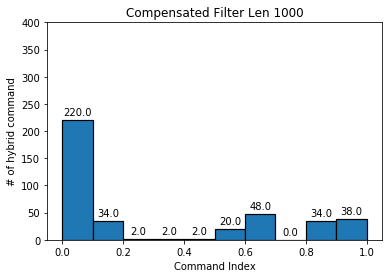

In [43]:
sr_list = []
for row in sr_list_1:
    sr_list.append(row)
for row in sr_list_1:
    sr_list.append(row)   
print(len(sr_list))


fig, ax = plt.subplots()

# print(sum(sr_res))
x = []
for i in range(20):
    x.append(str(i+1))
    
for i in range(len(sr_list)):
    sr_list[i] = float(sr_list[i])
    if sr_list[i] == -1:
        sr_list[i] = 0


a = ax.hist(sr_list, edgecolor='black', linewidth=1.2)
rects = ax.patches

for rect, label in zip(rects, a[0]):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
plt.ylim([0, 400])
plt.title('Compensated Filter Len 1000')
plt.xlabel('Command Index')
plt.ylabel('# of hybrid command')

[112.]


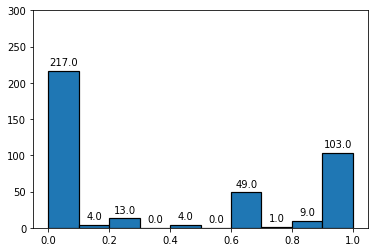

In [107]:
fig, ax = plt.subplots()

print(sum(sr_res))
x = []
for i in range(20):
    x.append(str(i+1))
    
    
for i in range(len(sr_list)):
    if sr_list[i] == -1:
        sr_list[i] = 0
        


a = ax.hist(sr_list, edgecolor='black', linewidth=1.2)
plt.ylim([0, 300])
rects = ax.patches
for rect, label in zip(rects, a[0]):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')


In [71]:
a[0]

array([217.,   4.,  13.,   0.,   4.,   0.,  49.,   1.,   9., 103.])

[39.]


(0, 20)

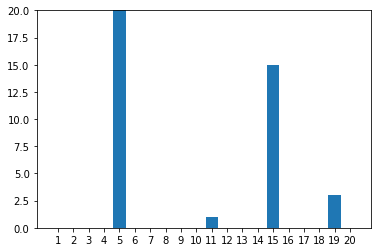

In [80]:
print(sum(sr_res_1))

x = []
for i in range(20):
    x.append(str(i+1))

plt.bar(x, sr_res_1.transpose()[0])
plt.ylim([0, 20])

[112.]


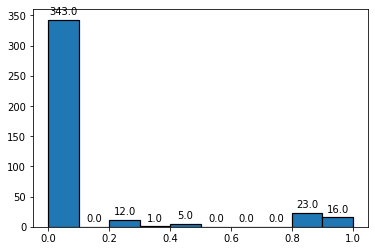

In [119]:
parentFolder = 'compensated/rec_compensatedPerceptionMaskNexusWlen10000/'

sr_list_1 = []
with open(parentFolder+"sr_transcript.csv") as csvFile:
    csv_reader = csv.reader(csvFile, delimiter=',')
    for row in csv_reader:
        if row[3] == -1:
            row[3] = 0
        sr_list_1.append(row[3])
            
#         print(row[3])



fig, ax = plt.subplots()

print(sum(sr_res))
x = []
for i in range(20):
    x.append(str(i+1))
    
for i in range(len(sr_list_1)):
    sr_list_1[i] = float(sr_list_1[i])
    if sr_list_1[i] == -1:
        sr_list_1[i] = 0


a = ax.hist(sr_list_1, edgecolor='black', linewidth=1.2)
rects = ax.patches

for rect, label in zip(rects, a[0]):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')


[112.]


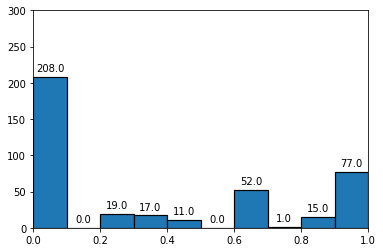

In [118]:
parentFolder = 'compensated/rec_compensatedPerceptionMaskPixelWlen1000/'

sr_list_1 = []
with open(parentFolder+"sr_transcript.csv") as csvFile:
    csv_reader = csv.reader(csvFile, delimiter=',')
    for row in csv_reader:
        if row[3] == -1:
            row[3] = 0
        sr_list_1.append(row[3])
            
#         print(row[3])

fig, ax = plt.subplots()

print(sum(sr_res))
x = []
for i in range(20):
    x.append(str(i+1))
    
    
for i in range(len(sr_list_1)):
    sr_list_1[i] = float(sr_list_1[i])
    if sr_list_1[i] == -1:
        sr_list_1[i] = 0
        


a = ax.hist(sr_list_1, edgecolor='black', linewidth=1.2)
rects = ax.patches
plt.xlim([0, 1])
plt.ylim([0, 300])

for rect, label in zip(rects, a[0]):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')


(0, 1)

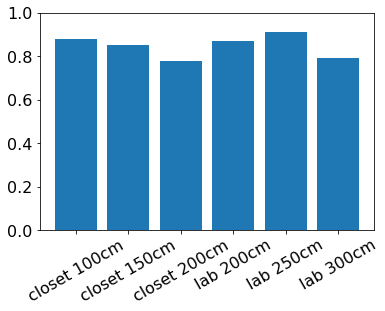

In [92]:
x = np.arange(6)
y = np.array([0.88, 0.85, 0.78, 0.87, 0.91, 0.79])
plt.bar(x, y)
plt.xticks(x, ['closet 100cm', 'closet 150cm', 'closet 200cm', 'lab 200cm', 'lab 250cm', 'lab 300cm'], 
           rotation=30, fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylim([0, 1])